# Importing Libraries

In [30]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Getting Data and coverting it into Pandas DataFrame

In [34]:
f=open('covid_states_daily.json','r')
covid_data_dict=json.load(f)
print(type(covid_data_dict))
print(covid_data_dict)

<class 'dict'>
{'states_daily': [{'an': '0', 'ap': '1', 'ar': '0', 'as': '0', 'br': '0', 'ch': '0', 'ct': '0', 'date': '14-Mar-20', 'dateymd': '2020-03-14', 'dd': '0', 'dl': '7', 'dn': '0', 'ga': '0', 'gj': '0', 'hp': '0', 'hr': '14', 'jh': '0', 'jk': '2', 'ka': '6', 'kl': '19', 'la': '0', 'ld': '0', 'mh': '14', 'ml': '0', 'mn': '0', 'mp': '0', 'mz': '0', 'nl': '0', 'or': '0', 'pb': '1', 'py': '0', 'rj': '3', 'sk': '0', 'status': 'Confirmed', 'tg': '1', 'tn': '1', 'tr': '0', 'tt': '81', 'un': '0', 'up': '12', 'ut': '0', 'wb': '0'}, {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', 'br': '0', 'ch': '0', 'ct': '0', 'date': '14-Mar-20', 'dateymd': '2020-03-14', 'dd': '0', 'dl': '1', 'dn': '0', 'ga': '0', 'gj': '0', 'hp': '0', 'hr': '0', 'jh': '0', 'jk': '0', 'ka': '0', 'kl': '3', 'la': '0', 'ld': '0', 'mh': '0', 'ml': '0', 'mn': '0', 'mp': '0', 'mz': '0', 'nl': '0', 'or': '0', 'pb': '0', 'py': '0', 'rj': '1', 'sk': '0', 'status': 'Recovered', 'tg': '0', 'tn': '0', 'tr': '0', 'tt': '9', 'un': '

In [33]:
covid_data_list=covid_data_dict['states_daily']
print(type(covid_data_list))

<class 'list'>


In [4]:
covid_data=pd.json_normalize(covid_data_list)
print(type(covid_data))

<class 'pandas.core.frame.DataFrame'>


In [5]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 42 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   an       1563 non-null   object
 1   ap       1563 non-null   object
 2   ar       1563 non-null   object
 3   as       1563 non-null   object
 4   br       1563 non-null   object
 5   ch       1563 non-null   object
 6   ct       1563 non-null   object
 7   date     1563 non-null   object
 8   dateymd  1563 non-null   object
 9   dd       1563 non-null   object
 10  dl       1563 non-null   object
 11  dn       1563 non-null   object
 12  ga       1563 non-null   object
 13  gj       1563 non-null   object
 14  hp       1563 non-null   object
 15  hr       1563 non-null   object
 16  jh       1563 non-null   object
 17  jk       1563 non-null   object
 18  ka       1563 non-null   object
 19  kl       1563 non-null   object
 20  la       1563 non-null   object
 21  ld       1563 non-null   object
 22  

In [6]:
covid_data.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0


## 1. Detailed Trend Analysis of Confirmed Cases

**Question**:

How has the number of confirmed COVID-19 cases evolved over the
515 days for different states? Can you identify any patterns or significant
 trends, such as periods of rapid increase or decrease?

In [7]:
# Filter out confirmed cases from the data
covid_data_confirmed=covid_data[covid_data['status']=='Confirmed'] #covid_data_confirmes=covid_data[covid_data.status=='Confirmed']
covid_data_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 521 entries, 0 to 1560
Data columns (total 42 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   an       521 non-null    object
 1   ap       521 non-null    object
 2   ar       521 non-null    object
 3   as       521 non-null    object
 4   br       521 non-null    object
 5   ch       521 non-null    object
 6   ct       521 non-null    object
 7   date     521 non-null    object
 8   dateymd  521 non-null    object
 9   dd       521 non-null    object
 10  dl       521 non-null    object
 11  dn       521 non-null    object
 12  ga       521 non-null    object
 13  gj       521 non-null    object
 14  hp       521 non-null    object
 15  hr       521 non-null    object
 16  jh       521 non-null    object
 17  jk       521 non-null    object
 18  ka       521 non-null    object
 19  kl       521 non-null    object
 20  la       521 non-null    object
 21  ld       521 non-null    object
 22  mh    

In [8]:
covid_data_confirmed.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
6,0,0,0,0,0,0,0,16-Mar-20,2020-03-16,0,...,0,Confirmed,1,0,0,15,0,0,1,0
9,0,0,0,0,0,0,0,17-Mar-20,2020-03-17,0,...,0,Confirmed,1,0,0,11,0,2,0,1
12,0,0,0,0,0,0,0,18-Mar-20,2020-03-18,0,...,0,Confirmed,8,1,0,37,0,2,1,0


In [9]:
cases_ch_confirmed=covid_data_confirmed[['date','ch']]
print(type(cases_ch_confirmed))
cases_ch_confirmed['ch']=cases_ch_confirmed.ch.astype(int)


<class 'pandas.core.frame.DataFrame'>


<ipython-input-9-4f99bb1e9eff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_ch_confirmed['ch']=cases_ch_confirmed.ch.astype(int)


In [10]:
cases_ch_confirmed.to_excel('ch_confirmed.xlsx',index=False)

In [11]:
cases_ch_confirmed['date'] = pd.to_datetime(cases_ch_confirmed['date'])
cases_ch_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 521 entries, 0 to 1560
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    521 non-null    datetime64[ns]
 1   ch      521 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 12.2 KB


<ipython-input-11-72cb93d24f8e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cases_ch_confirmed['date'] = pd.to_datetime(cases_ch_confirmed['date'])
<ipython-input-11-72cb93d24f8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_ch_confirmed['date'] = pd.to_datetime(cases_ch_confirmed['date'])


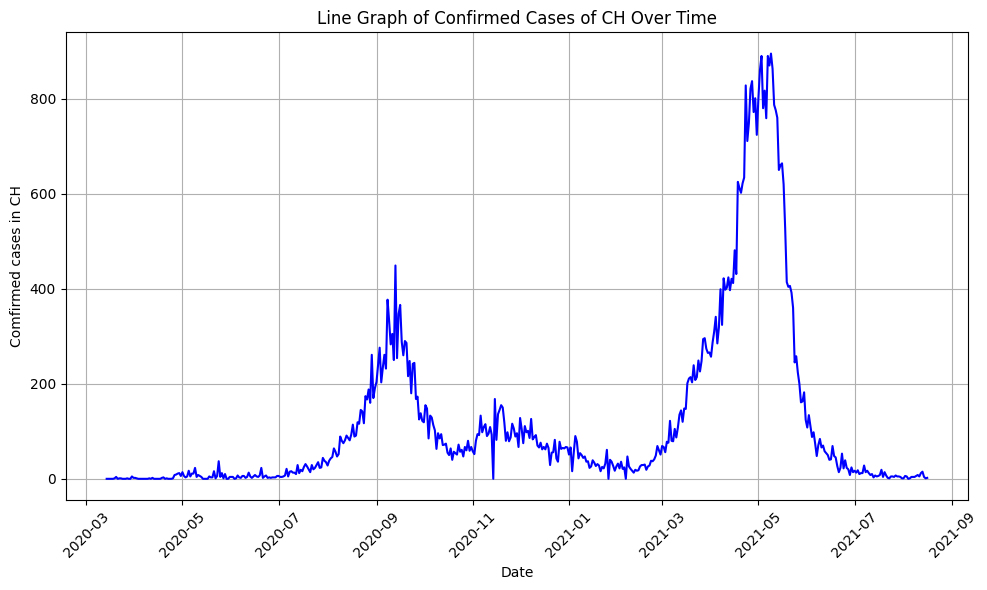

In [12]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(cases_ch_confirmed['date'], cases_ch_confirmed['ch'], linestyle='-', color='b')

# Customize the graph
plt.title('Line Graph of Confirmed Cases of CH Over Time')
plt.xlabel('Date')
plt.ylabel('Comfirmed cases in CH')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

## 2. Predicting Future Active Cases
Question: Based on the past 515 days of data, can you predict the number of active COVID-19 cases for the next 10 days in a given state? What factors might affect the accuracy of your prediction?

In [13]:
covid_data['status'].value_counts()

,count
status,
Confirmed,521
Recovered,521
Deceased,521


In [14]:
confirmed=covid_data[covid_data['status']=='Confirmed']
recovered=covid_data[covid_data['status']=='Recovered']
deceased=covid_data[covid_data['status']=='Deceased']

confirmed=confirmed[['dateymd','ch']].rename(columns={'ch':'confirmed_ch'})
recovered=recovered[['dateymd','ch']].rename(columns={'ch':'recovered_ch'})
deceased=deceased[['dateymd','ch']].rename(columns={'ch':'deceased_ch'})

data_merge=confirmed.merge(recovered,on='dateymd',how='left').merge(deceased,on='dateymd',how='left')

data_merge.fillna(0,inplace=True)
data_merge.head()

,dateymd,confirmed_ch,recovered_ch,deceased_ch
0,2020-03-14,0,0,0
1,2020-03-15,0,0,0
2,2020-03-16,0,0,0
3,2020-03-17,0,0,0
4,2020-03-18,0,0,0


In [15]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   dateymd       521 non-null    object
 1   confirmed_ch  521 non-null    object
 2   recovered_ch  521 non-null    object
 3   deceased_ch   521 non-null    object
dtypes: object(4)
memory usage: 16.4+ KB


In [16]:
data_merge['confirmed_ch']=pd.to_numeric(data_merge['confirmed_ch'],errors='coerce')
data_merge['recovered_ch']=pd.to_numeric(data_merge['recovered_ch'],errors='coerce')
data_merge['deceased_ch']=pd.to_numeric(data_merge['deceased_ch'],errors='coerce')
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   dateymd       521 non-null    object
 1   confirmed_ch  521 non-null    int64 
 2   recovered_ch  521 non-null    int64 
 3   deceased_ch   521 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 16.4+ KB


In [17]:
data_merge['active_ch']=data_merge['confirmed_ch']-data_merge['recovered_ch']-data_merge['deceased_ch']
data_merge.head(200).tail(10)

,dateymd,confirmed_ch,recovered_ch,deceased_ch,active_ch
190,2020-09-20,286,372,4,-90
191,2020-09-21,216,273,3,-60
192,2020-09-22,248,383,4,-139
193,2020-09-23,180,255,10,-85
194,2020-09-24,242,293,7,-58
195,2020-09-25,244,335,1,-92
196,2020-09-26,168,260,0,-92
197,2020-09-27,173,166,2,5
198,2020-09-28,125,222,6,-103
199,2020-09-29,138,273,5,-140


In [18]:
data_merge['dateymd']=pd.to_datetime(data_merge['dateymd'])
data_merge['date_ordinal']=data_merge['dateymd'].map(lambda x: x.toordinal())
X=data_merge[['date_ordinal']]
y=data_merge['active_ch']

In [19]:
model=LinearRegression()
model.fit(X,y)
last_date=data_merge['dateymd'].max()
next_dates=[last_date+pd.Timedelta(days=x) for x in range(1,11)]
next_dates_ordinal=np.array([date.toordinal() for date in next_dates]).reshape(-1,1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


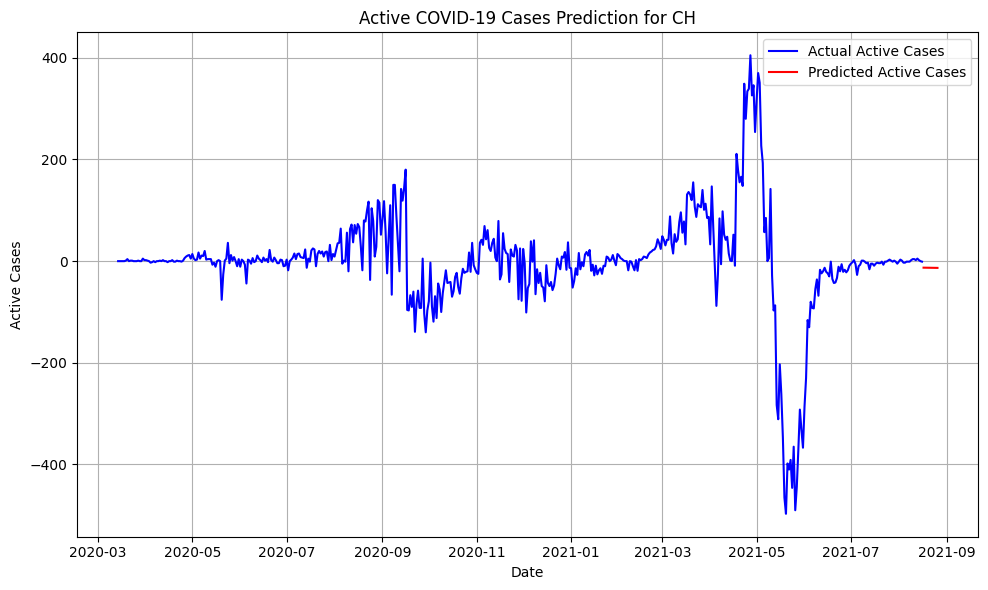

In [20]:
future_active_cases=model.predict(next_dates_ordinal)
future_data=pd.DataFrame({'date':next_dates,'predictive_active_ch':future_active_cases})


plt.figure(figsize=(10,6))
plt.plot(data_merge['dateymd'],data_merge['active_ch'],label='Actual Active Cases',color='blue')


plt.plot(future_data['date'],future_data['predictive_active_ch'],label='Predicted Active Cases',color='red')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active COVID-19 Cases Prediction for CH')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Examining the Relationship Between Confirmed and Recovered Cases
Question: Is there a strong relationship between confirmed and recovered cases for a given state? Can you fit a linear equation to model this relationship? How strong is the correlation between the two?

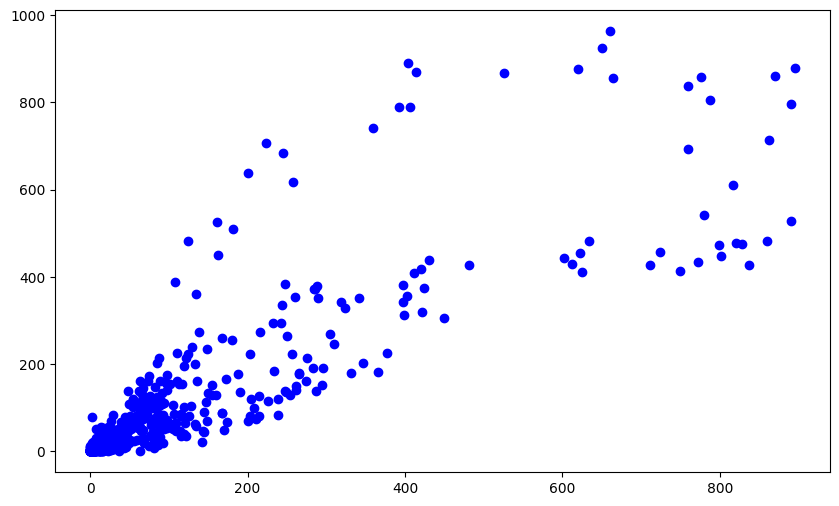

In [21]:
X=data_merge[['confirmed_ch']]
y=data_merge[['recovered_ch']]

plt.figure(figsize=(10,6))
plt.scatter(X,y,color='blue',label='Data points')

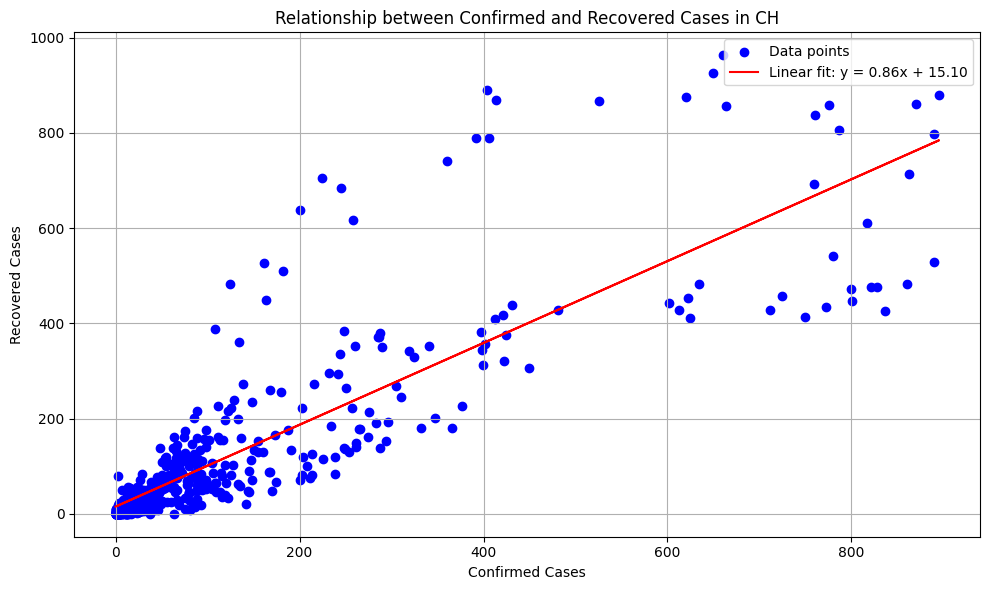

In [22]:

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')

plt.plot(X, y_pred, color='red', label=f'Linear fit: y = {model.coef_[0][0]:.2f}x + {model.intercept_[0]:.2f}')

plt.title('Relationship between Confirmed and Recovered Cases in CH')
plt.xlabel('Confirmed Cases')
plt.ylabel('Recovered Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
r2 = model.score(X, y)
print(f"R² score: {r2:.4f}")

R² score: 0.7348


## 4. Comparing Recovery Rates Across States

Question: Which states have the highest and lowest recovery rates over the past 515 days? Can you identify any trends or common factors among states with high or low recovery rates?


In [24]:
states=covid_data.columns.tolist()
states.remove('dateymd')
states.remove('date')
states.remove('status')
print(states)

['an', 'ap', 'ar', 'as', 'br', 'ch', 'ct', 'dd', 'dl', 'dn', 'ga', 'gj', 'hp', 'hr', 'jh', 'jk', 'ka', 'kl', 'la', 'ld', 'mh', 'ml', 'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'py', 'rj', 'sk', 'tg', 'tn', 'tr', 'tt', 'un', 'up', 'ut', 'wb']


In [25]:
recovery_rates = {}
for state in states:
    confirmed_total = covid_data[covid_data['status'] == 'Confirmed'][state].astype(int).sum()
    recovered_total = covid_data[covid_data['status'] == 'Recovered'][state].astype(int).sum()

    if confirmed_total > 0:
        recovery_rate = (recovered_total / confirmed_total) * 100
    else:
        recovery_rate = 0

    recovery_rates[state] = recovery_rate

In [26]:
recovery_df = pd.DataFrame(list(recovery_rates.items()), columns=['state', 'recovery_rate'])
recovery_df['recovery_rate'] = pd.to_numeric(recovery_df['recovery_rate'])
recovery_df=recovery_df.sort_values(by='recovery_rate',ascending=False)


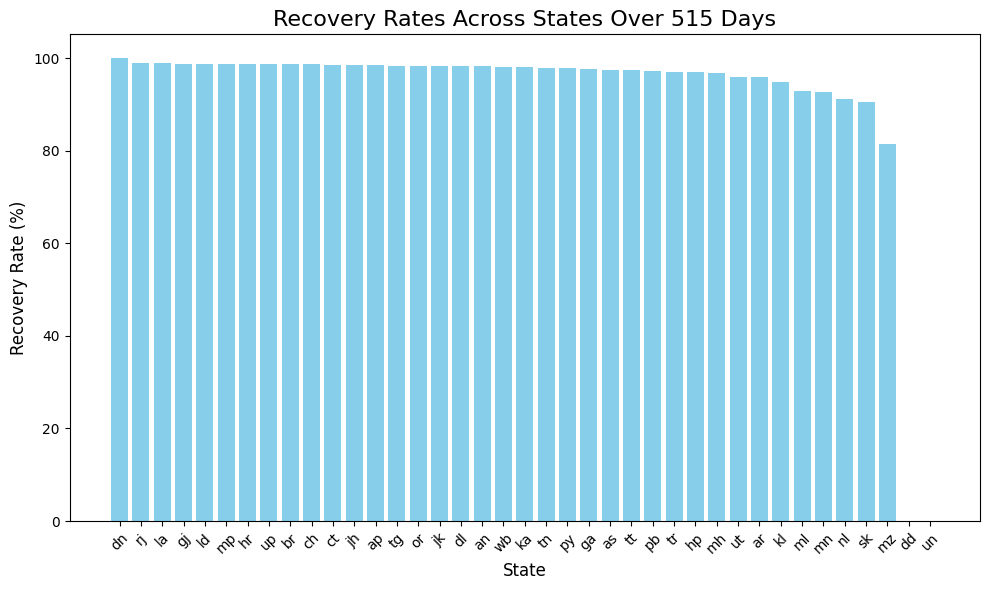

In [27]:
plt.figure(figsize=(10,6))
plt.bar(recovery_df['state'],recovery_df['recovery_rate'],color='skyblue')
plt.xlabel('State',fontsize=12)
plt.ylabel('Recovery Rate (%)', fontsize=12)
plt.title('Recovery Rates Across States Over 515 Days',fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
top_states=recovery_df.head(5)
print("Top 5 States with Highest Recovery Rates:")
print(top_states)

Top 5 States with Highest Recovery Rates:
   state  recovery_rate
9     dn     100.133080
29    rj      99.042511
18    la      98.924258
11    gj      98.756658
19    ld      98.737128


In [29]:
bottom_states=recovery_df.tail(5)
print("Top 5 States with Lowest Recovery Rates:")
print(bottom_states)

Top 5 States with Lowest Recovery Rates:
   state  recovery_rate
25    nl      91.230537
30    sk      90.532359
24    mz      81.392293
7     dd       0.000000
35    un       0.000000
